![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banner_Top_06.06.18.jpg?raw=true)  


<h1 align='center'>Environment Canada Weather Data Notebook Demo</h1>

<h4 align='center'>Adapted from Laura Gutierrez Funderburk $\mid$ Data Exploration $\mid$ Canada Historical Climate Data</h4>

<h3 align='center'>Download data by province and get station numbers</h3>

In this first part of the notebook, we will download data from http://climate.weather.gc.ca/historical_data/search_historic_data_e.html. 
The set of functions is predefined in **notebook_code** directory **weather.py** file.

First we will call **download_raw_data()** function, giving it province name and start year, it will download raw html.

Second we call **generate_pandas_dataframe_from_html()** function, giving it raw html (result from previous function), it will convert it to dataframe extracting Station Numbers and frequency with which the data was collected. 

Let us take the province SK, start year 2011 and download stations metadata.

In [1]:
## Install missing python libraries
#!pip install tqdm --user

In [2]:
# Import helper functions
from notebook_code.weather import *

In [3]:
# Specify Parameters
province = "SK"      # Which province to parse?
start_year = "2011"  # Looking for stations with data available between 2011 and 2018. 

We download raw html pages


In [4]:
# Use download_raw_data() function to download raw html
html_frames = download_raw_data(province,start_year)

A Jupyter Widget

We convert the html pages into DataFrames. A **DataFrame** is a commonly encountered way to work with data in data science. It can be thought of as a 2D data structure that makes it easy to work with the data at hand.

In [5]:
# Use generate_pandas_dataframe_from_html to convert html into dataframe
stations_df = generate_pandas_dataframe_from_html(html_frames)

A Jupyter Widget

We preview the first five entries. In the table below you can see five columns: the StationsID will be the key part to accessing full data sets. The Name contains city names found under SK, the Intervals column states the frequency with which the data was updated, while Year Start and Year end state the years between which the data was collected.
This result should be equivalent to this [web-page](http://climate.weather.gc.ca/historical_data/search_historic_data_stations_e.html?searchType=stnProv&timeframe=1&lstProvince=SK&optLimit=yearRange&StartYear=2011&EndYear=2018&Year=2018&Month=12&Day=10&selRowPerPage=100)

In [6]:
# Preview first 5 rows
stations_df.head()

,StationID,Name,Intervals,Year Start,Year End
0,10805,ASSINIBOIA AIRPORT,"[Hourly, Daily, Monthly]",1994,2018
1,3350,BEACON HILL,"[Daily, Monthly]",1983,2017
2,10713,BEARTOOTH ISLAND,"[Hourly, Daily, Monthly]",1994,2001
3,3071,BEECHY,"[Daily, Monthly]",1926,2018
4,3210,BICKLEIGH,"[Daily, Monthly]",1988,2018


Let's now pick only those entries that belong to Regina. Note that the function will pick up every station containing word "Regina"

In [7]:
# Select subset of the data from a specific location and preview first few entries
Regina_data = get_weather_data_by_loc(stations_df,location_name="Regina")
Regina_data.head()

,StationID,Name,Intervals,Year Start,Year End
93,46587,REGINA CO-OP UPGRADER SNOW,"[Daily, Monthly]",2004,2013
94,3007,REGINA GILMOUR,"[Daily, Monthly]",1970,2016
95,3002,REGINA INT'L A,"[Hourly, Daily, Monthly]",1953,2013
96,51441,REGINA INTL A,"[Hourly, Daily]",2013,2018
97,46607,REGINA RCMP SNOW,"[Daily, Monthly]",2004,2016


In [8]:
#Exercise: try extracting rows for other city, replace ?? with the city name (Saskatoon for example)
#Note that if the result is empty - it means no data is found
other_city_data = get_weather_data_by_loc(stations_df,location_name="??")
other_city_data.head()

,StationID,Name,Intervals,Year Start,Year End


<h3 align='center'>Downloading Data by Station</h3>

In the second  part of the notebook, we will download hourly temperatures data using StationID we got in the first part. 
  
For Regina there are 5 stations collecting data, we will choose station **REGINA INTL A - 51441**  because it has the most recent hourly data.
  
First we will call **download_data_date_range()** giving it StationID and dates range in  format "mmmYYYY". We will collect and compare data fro 3 winters  - 2016, 2017 and 2018. 
  
Then we will use **matplotlib** to plot the results. 

In [32]:
## Use download_data_date_range() function to collect hourly temperaure from Dec2015 to Feb2016
winter_2016 = download_data_date_range(51441,"Dec2015","Feb2016")
winter_2017 = download_data_date_range(51441,"Dec2016","Feb2017")
winter_2018 = download_data_date_range(51441,"Dec2017","Feb2018")

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [33]:
## Preview first 5 rows for winder2016: we are interested only in  Date/Time and Temp (°C) columns
winter_2016.head()

,Date/Time,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2015-12-01 00:00:00,2015,12,1,00:00,-10.8,NaN,-12.4,NaN,88.0,...,NaN,24.1,NaN,94.50,NaN,NaN,NaN,-16.0,NaN,Clear
1,2015-12-01 01:00:00,2015,12,1,01:00,-11.4,NaN,-12.9,NaN,89.0,...,NaN,24.1,NaN,94.50,NaN,NaN,NaN,-18.0,NaN,NaN
2,2015-12-01 02:00:00,2015,12,1,02:00,-12.3,NaN,-13.9,NaN,88.0,...,NaN,24.1,NaN,94.46,NaN,NaN,NaN,-17.0,NaN,NaN
3,2015-12-01 03:00:00,2015,12,1,03:00,-12.2,NaN,-13.9,NaN,87.0,...,NaN,24.1,NaN,94.45,NaN,NaN,NaN,-17.0,NaN,Clear
4,2015-12-01 04:00:00,2015,12,1,04:00,-12.7,NaN,-14.4,NaN,87.0,...,NaN,24.1,NaN,94.45,NaN,NaN,NaN,-18.0,NaN,NaN


In [34]:
#Exercise: try downloading data for winter 2015 
#replace ?? with corrrect months: (example: for winter 2015 - it should be from Dec2014 to Feb2015)
winter_2015 = download_data_date_range(51441,"??","??")

INVALID INPUT. ENTER AN INTEGER FOR stationID, A STRING FOLLOWING THE FORMAT MonYEAR, i.e. Jun2015


In [35]:
## Check yourself: preview first 5 rows for winter2015
winter_2015.head()

AttributeError: 'NoneType' object has no attribute 'head'

Now we will use **matplotlib** library to plot this data. 

In [36]:
## Define matplotlib parameteres
%matplotlib inline  
sns.set_style('whitegrid')

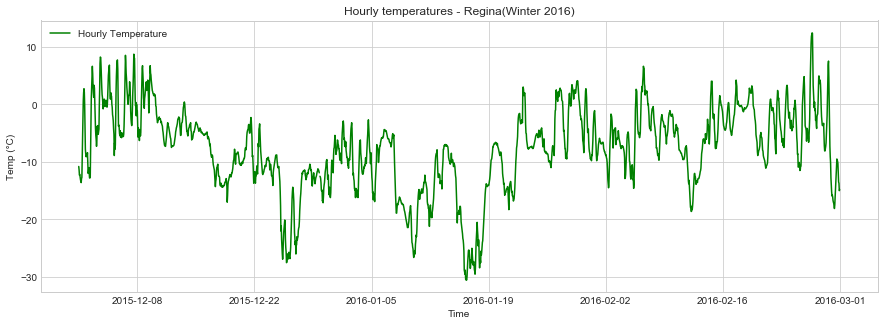

In [37]:
## We will plot winter 2016 temperatures first
fig = plt.figure(figsize=(15,5))                                   # set matplotlib figure size
# Plot two columns: Date/Time and Temp using color green - "g"
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'],"g", label='Hourly Temperature')
plt.title("Hourly temperatures - Regina(Winter 2016)")             # plot title
plt.ylabel('Temp (°C)')                                            # y axis label
plt.xlabel('Time')                                                 # x axis label
plt.legend()                                                       # show the legend
plt.show()                                                         # display the plot

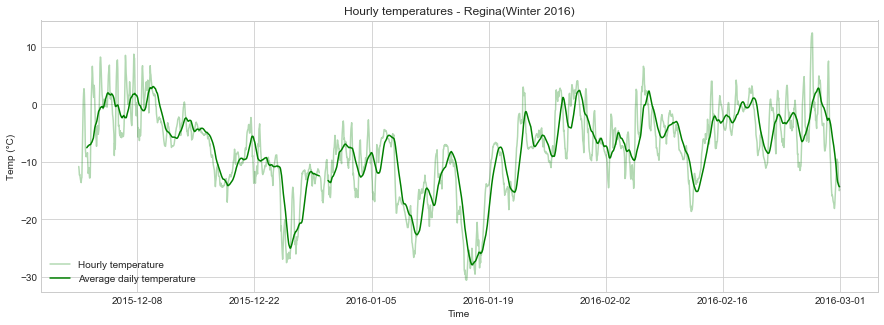

In [38]:
## Now we create exactly the same plot + add daily average
fig = plt.figure(figsize=(15,5))
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'],"g", label='Hourly temperature',alpha=0.3) #alpha=0.3 - transparent
## This is a new line calculating averages every 24 poins(hours)
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'].rolling(window=24,center=False).mean(),'g', label='Average daily temperature')
plt.title("Hourly temperatures - Regina(Winter 2016)")
plt.ylabel('Temp (°C)')
plt.xlabel('Time')
plt.legend()
plt.show()

In [39]:
#Excersise: replace ?? with 2017 or 2018 and try plotting data for different year
# we use different color here - "b" (blue)
fig = plt.figure(figsize=(15,5))
plt.plot(winter_??['Date/Time'], winter_??['Temp (°C)'],"b", alpha=0.3)
plt.plot(winter_??['Date/Time'], winter_??['Temp (°C)'].rolling(window=24,center=False).mean(),"b")
plt.ylabel('Temp (°C)')
plt.xlabel('Time')
plt.show()

SyntaxError: invalid syntax (<ipython-input-39-aa3d8619086b>, line 4)

Now we will plot and compare all 3 winters, we will draw vertical lines to visualy distinguish 3 winter months.

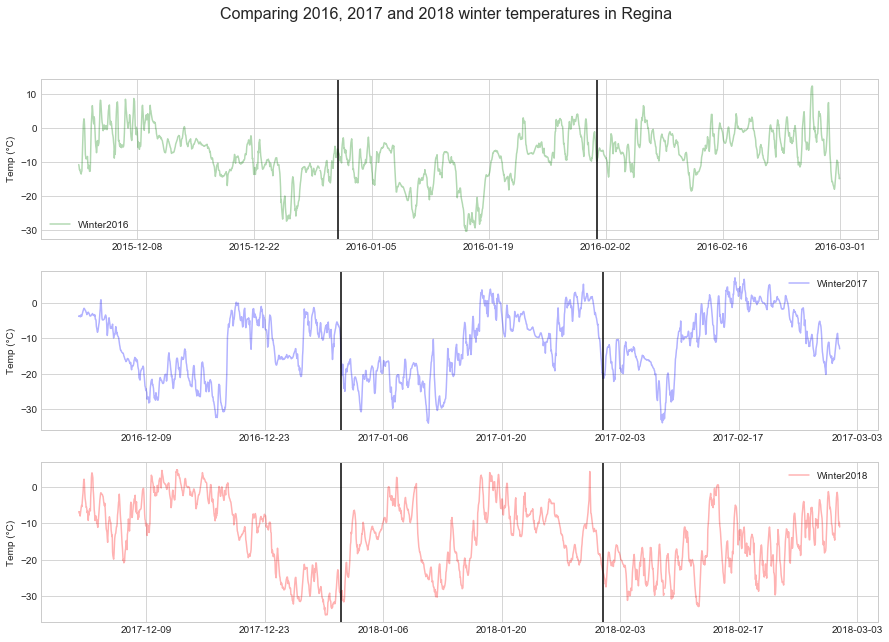

In [40]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Comparing 2016, 2017 and 2018 winter temperatures in Regina",fontsize=16)

### Set up a plot with subplots (rows, columns, active plot)
plt.subplot(311)
plt.plot(winter_2016['Date/Time'], winter_2016['Temp (°C)'],'g', alpha=0.3,label='Winter2016')
plt.axvline(datetime(2016, 1, 1),color='k')      # January 1st vertical line
plt.axvline(datetime(2016, 2, 1),color='k')      # February 1st vertical line
plt.ylabel('Temp (°C)')
plt.legend()

plt.subplot(312)
plt.plot(winter_2017['Date/Time'], winter_2017['Temp (°C)'],'b', alpha=0.3,label='Winter2017')
plt.axvline(datetime(2017, 1, 1),color='k')      # January 1st vertical line
plt.axvline(datetime(2017, 2, 1),color='k')      # February 1st vertical line
plt.ylabel('Temp (°C)')
plt.legend()

plt.subplot(313)
plt.plot(winter_2018['Date/Time'], winter_2018['Temp (°C)'],'r', alpha=0.3,label='Winter2018')
plt.axvline(datetime(2018, 1, 1),color='k')       # January 1st vertical line
plt.axvline(datetime(2018, 2, 1),color='k')       # February 1st vertical line
plt.ylabel('Temp (°C)')
plt.legend()

plt.show()

We see that the coldest Christmas was last year  (up to -30) - and the coldest February as well (mostly around -20 with spikes up to 0).
The warmest February was 2016 (up to +10) and the same for beginning of December.

<h2 align='center'>Conclusion</h2>

In this notebook we explored  ways working with open data. - historical weather data.

We first pulled raw html pages and then converted them in a tabular form using pandas dataframes.   
We got station id for specific city and pulled hourly data for this location.

We explored way plotting data using matplotlib (hourly and daily averages).
We plotted data for 3 winters and compared it.


![alt text](https://github.com/callysto/callysto-sample-notebooks/blob/master/notebooks/images/Callysto_Notebook-Banners_Bottom_06.06.18.jpg?raw=true)